# Análise Métricas - Financial Application

Referências:
- https://www.significados.com.br/intervalo-de-confianca/

In [1]:
import json
import numpy as np 
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
def processFile(filename):
  file = open(filename, 'r')

  getMetrics = []
  postMetrics = []

  for line in file:
    data = json.loads(line)
    if data['type'] == 'Point' and data['metric'] == 'http_req_duration':
      if data['data']['tags']['method'] == 'GET':
        getMetrics.append(data['data']['value'])
      elif data['data']['tags']['method'] == 'POST' and data['data']['tags']['url'].endswith('/transactions'):
        postMetrics.append(data['data']['value'])
  
  getMetrics.pop(-1)

  return getMetrics, postMetrics

def getInterval(metrics):
  Z = 2.58 # 99%

  average = np.average(metrics)
  std = np.std(metrics)

  difference = Z * (std / np.sqrt(len(metrics)))
  
  return [average - difference, average, average + difference], difference

In [3]:
v1GetMetrics, v1PostMetrics = processFile('/content/gdrive/MyDrive/financial-application-data/v1-results.json')
v2GetMetrics, v2PostMetrics = processFile('/content/gdrive/MyDrive/financial-application-data/v2-results.json')
v3GetMetrics, v3PostMetrics = processFile('/content/gdrive/MyDrive/financial-application-data/v3-results.json')

In [4]:
v1GetInterval, v1GetDifference = getInterval(v1GetMetrics)
v1PostInterval, v1PostDifference = getInterval(v1PostMetrics)

v2GetInterval, v2GetDifference = getInterval(v2GetMetrics)
v2PostInterval, v2PostDifference = getInterval(v2PostMetrics)

v3GetInterval, v3GetDifference = getInterval(v3GetMetrics)
v3PostInterval, v3PostDifference = getInterval(v3PostMetrics)

print('GET METRICS')
print('V1: ' + str(v1GetInterval))
print('V2: ' + str(v2GetInterval))
print('V3: ' + str(v3GetInterval))

print('\n')

print('POST METRICS')
print('V1: ' + str(v1PostInterval))
print('V2: ' + str(v2PostInterval))
print('V3: ' + str(v3PostInterval))

GET METRICS
V1: [35.904652070854304, 36.16863432339999, 36.43261657594568]
V2: [26.7658078390303, 26.9563871648, 27.1469664905697]
V3: [7.9252659092497115, 8.0285185696, 8.131771229950287]


POST METRICS
V1: [33.500673218685854, 33.7269085983, 33.953143977914145]
V2: [46.82780848388219, 47.0874064247, 47.34700436551781]
V3: [38.24608072627625, 38.5411126251, 38.83614452392375]


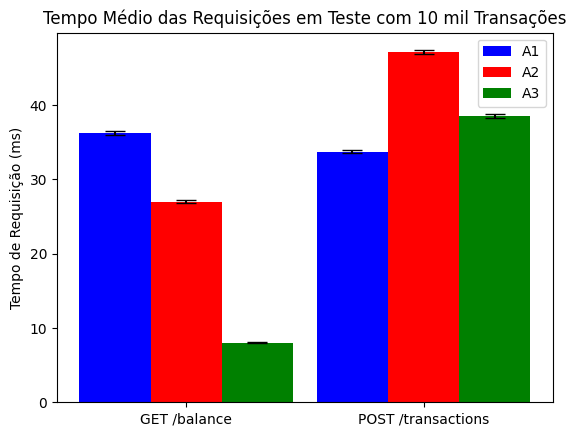

In [5]:
plt.title('Tempo Médio das Requisições em Teste com 10 mil Transações')

barWidth = 0.3
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, [np.average(v1GetMetrics), np.average(v1PostMetrics)], width = barWidth, color = 'blue', yerr=[v1GetDifference, v1PostDifference], capsize=7, label='A1')
plt.bar(r2, [np.average(v2GetMetrics), np.average(v2PostMetrics)], width = barWidth, color = 'red', yerr=[v2GetDifference, v2PostDifference], capsize=7, label='A2')
plt.bar(r3, [np.average(v3GetMetrics), np.average(v3PostMetrics)], width = barWidth, color = 'green', yerr=[v3GetDifference, v3PostDifference], capsize=7, label='A3')

plt.xticks([r + barWidth for r in range(2)], ['GET /balance', 'POST /transactions'])

plt.ylabel("Tempo de Requisição (ms)")
plt.legend()
plt.show()

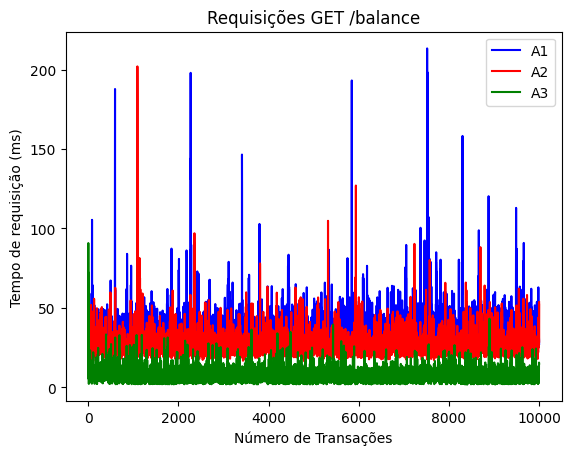

In [11]:
plt.title('Requisições GET /balance')

plt.xlabel("Número de Transações")
plt.ylabel("Tempo de requisição (ms)")

plt.plot(v1GetMetrics, color="blue", label='A1')

plt.plot(v2GetMetrics, color="red", label='A2')

plt.plot(v3GetMetrics, color="green", label='A3')

plt.legend()
plt.show()

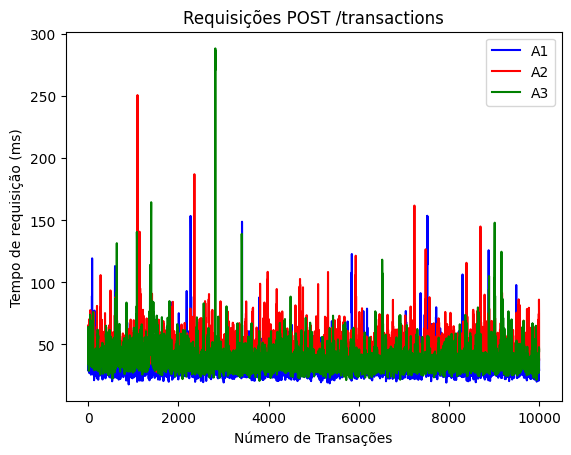

In [12]:
plt.title('Requisições POST /transactions')

plt.xlabel("Número de Transações")
plt.ylabel("Tempo de requisição (ms)")

plt.plot(v1PostMetrics, color="blue", label='A1')

plt.plot(v2PostMetrics, color="red", label='A2')

plt.plot(v3PostMetrics, color="green", label='A3')

plt.legend()
plt.show()